In [1]:
import jax
import jax.numpy as np
import matplotlib.pyplot as plt

import dissociation as ds

from cycler import cycler

plt.style.use("./style.mplstyle")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
in_dim = 8
hidden_dim = 4
out_dim = 3
p = 3

steps = 501

xs, ys = ds.random_regression_task(in_dim, out_dim, p)
w1s, w2s = ds.walk_mrns(xs, ys, hidden_dim, steps, alpha=0.005)

In [3]:
fs = np.einsum("toh,thi->toi", w2s, w1s)
h1s = np.einsum("thi,in->thn", w1s, xs)
ys_ = np.einsum("toh,thi,in->ton", w2s, w1s, xs)
loss = 0.5 * np.linalg.norm(ys_ - ys, axis=(1, 2))**2

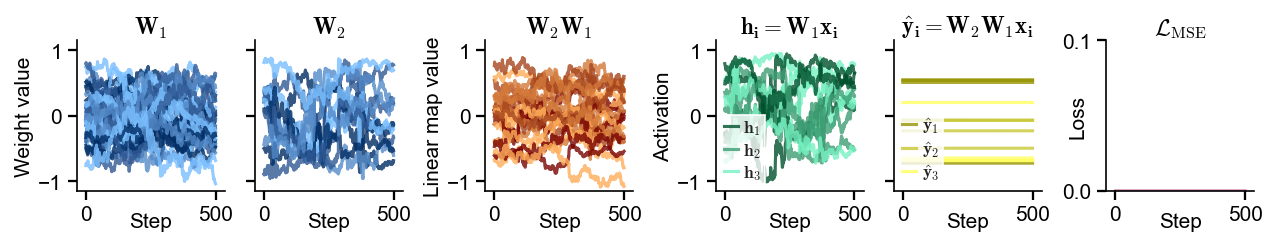

In [4]:
fig, axs = plt.subplots(1, 6, figsize=(1.4*6, 1.53))
axs = axs.flatten()

ax = axs[0]
ax.set_prop_cycle(cycler(color=ds.sequential(colors[0], hidden_dim)))
ax.plot(w1s.reshape(steps, -1), alpha=0.8)
ax.set_title("$\\mathbf{W_1}$")
ax.set_ylabel("Weight value")

ax = axs[1]
ax.set_prop_cycle(cycler(color=ds.sequential(colors[0], hidden_dim)))
ax.plot(w2s.reshape(steps, -1), alpha=0.8)
ax.set_title("$\\mathbf{W_2}$")

ax = axs[2]
ax.set_prop_cycle(cycler(color=ds.sequential(colors[1], hidden_dim)))
ax.plot(fs.reshape(steps, -1), alpha=0.8)
ax.set_title("$\\mathbf{W_2}\\mathbf{W_1}$")
ax.set_ylabel("Linear map value")

ax = axs[3]
greens = ds.sequential(colors[2], p)
for j in range(hidden_dim):
    for i in range(3):
        if j == 0:
            ax.plot(h1s[:, j, i], c=greens[i], label="$\\mathbf{h}_" + str(i+1) + "$", alpha=0.8);
        else:
            ax.plot(h1s[:, j, i], c=greens[i], alpha=0.8);
ax.set_title("$\\mathbf{h_i} = \\mathbf{W_1}\\mathbf{x_i}$")
ax.set_ylabel("Activation")
ax.legend(loc="lower left", frameon=True, edgecolor="w", facecolor="w", framealpha=0.8)


ax = axs[4]
yellows = ds.sequential(colors[3], p)
for j in range(hidden_dim):
    for i in range(out_dim):
        if j == 0:
            ax.plot(ys_[:, j, i], c=yellows[i], label="$\\mathbf{\\hat{y}_" + str(i+1) + "}$", alpha=0.8);
        else:
            ax.plot(ys_[:, j, i], c=yellows[i], alpha=0.8);
ax.set_title("$\\mathbf{\\hat{y}_i} = \\mathbf{W_2}\\mathbf{W_1}\\mathbf{x_i}$")

ax.legend(loc="lower left", frameon=True, edgecolor="w", facecolor="w", framealpha=0.8)

for i in range(5):
    if i == 1 or i == 4:
        axs[i].set_yticklabels([])
    axs[i].set_ylim(-1.15, 1.15)

ax = axs[5]
ax.plot(loss, c=colors[4])
ax.set_ylim(0, 0.1)
ax.set_yticks([0, 0.1])
ax.set_title("$\\mathcal{L}_\\text{MSE}$")
ax.set_ylabel("Loss", labelpad=-12)

for i in range(6):
    axs[i].set_xlabel("Step", labelpad=-6)
    axs[i].set_xticks([0, 500])

plt.savefig("../figures/fig1/random-walk.svg", dpi=300)